<a href="https://colab.research.google.com/github/fcarcamo03/PROG/blob/main/metodo2_variabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
install.packages("dplyr")
install.packages("ggplot2")
library("dplyr")
library("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
#carga archivo
datosP <- read.csv("https://raw.githubusercontent.com/fcarcamo03/PROG/main/CONTROL%201/DatosPaises.csv", sep = ";", header = TRUE)
 head(datosP)

,PAIS,PIB,POB,IDH,GINI,IPC,FAO,GENERO,ELECTRICIDAD,ESCOLARIDAD,⋯,TURISMO,INTERNET,VIOLENCIA,VIDA,CELULAR,DESERCION,PRISION,RENOVABLE,PARLAMENTO,INMIGRANTES
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Qatar,127.54265,2.169,0.8498,29.95,107.07,1.75,0.524,98,13.79,⋯,2.611,91.49,38.3,78.2,145.76,2.26,60,0.00,0.00,73.82
2,Luxembourg,87.77164,0.543,0.8919,29.00,108.01,1.27,0.100,100,13.88,⋯,0.945,94.67,39.5,81.7,148.37,5.60,122,3.98,28.33,43.25
3,Kuwait,82.36923,3.250,0.8163,29.00,111.19,2.60,0.387,98,14.75,⋯,0.300,78.70,39.5,74.4,218.43,5.93,137,0.00,1.54,60.21
4,Singapore,76.24004,5.399,0.9118,29.95,112.65,1.02,0.088,100,15.40,⋯,11.900,82.00,9.2,83.0,158.13,1.32,230,2.79,25.25,42.93
5,Brunei,69.44976,0.418,0.8556,29.00,102.88,2.95,0.064,76,14.53,⋯,0.225,68.77,39.5,78.8,110.06,3.63,122,0.00,23.17,49.35
6,Norway,62.45083,5.084,0.9439,26.83,104.19,1.51,0.067,100,17.49,⋯,4.963,96.30,26.8,81.6,116.51,1.51,72,47.75,39.64,13.77


In [34]:
#IDH sin datos atipicos

va_inf = mean(datosP$IDH) - ( 4*sd(datosP$IDH) )
va_sup = mean(datosP$IDH) + ( 4*sd(datosP$IDH) )

va_inf
va_sup


datosVar  <- datosP %>%
  filter(IDH >= va_inf & IDH <= va_sup)




[1] 0.07361699

[1] 1.311266

In [35]:
# datos outleirs
datosP %>%
  filter(IDH < va_inf | IDH > va_sup) %>%
  select(PAIS,PIB,IDH)


PAIS,PIB,IDH
<chr>,<dbl>,<dbl>


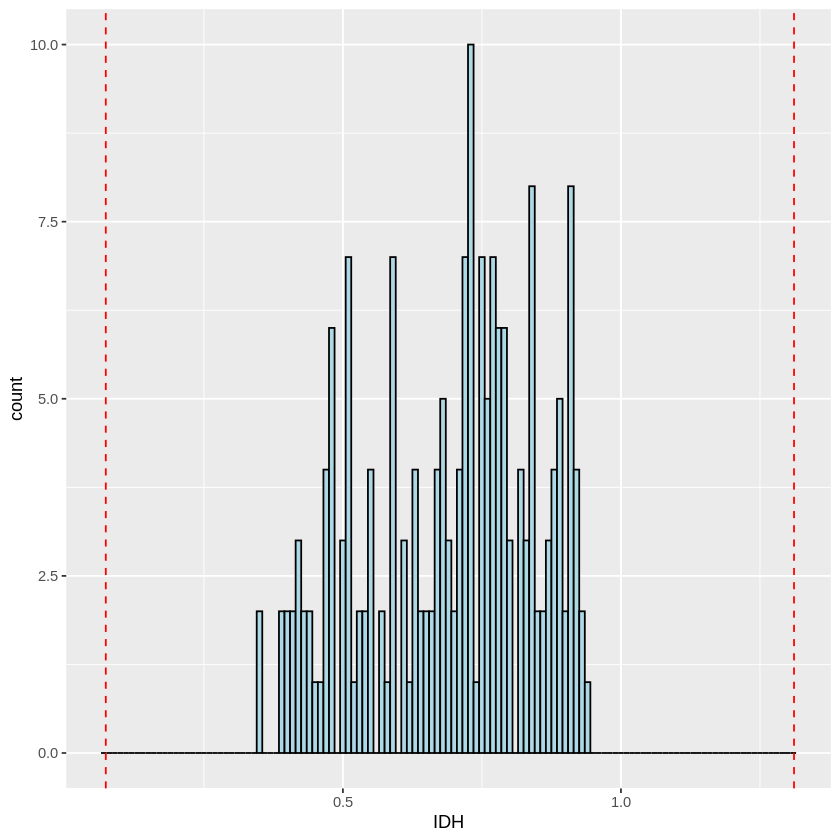

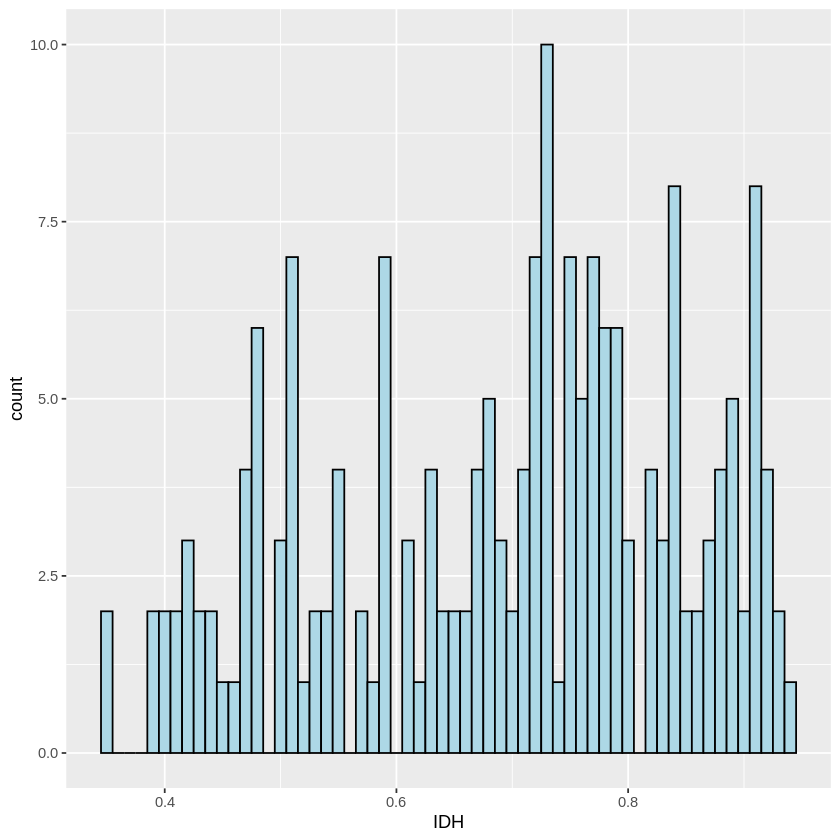

In [ ]:

datosP %>%
  ggplot()+
 aes(IDH) +
  geom_histogram(binwidth = 0.01, fill = "lightblue", color = "black") +
  geom_vline(xintercept = c(va_inf, va_sup), linetype = "dashed", color = "red")

datosVar %>%
  ggplot()+
 aes(IDH) +
  geom_histogram(binwidth = 0.01, fill = "lightblue", color = "black") #+
  #geom_vline(xintercept = c(va_inf, va_sup), linetype = "dashed", color = "red")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


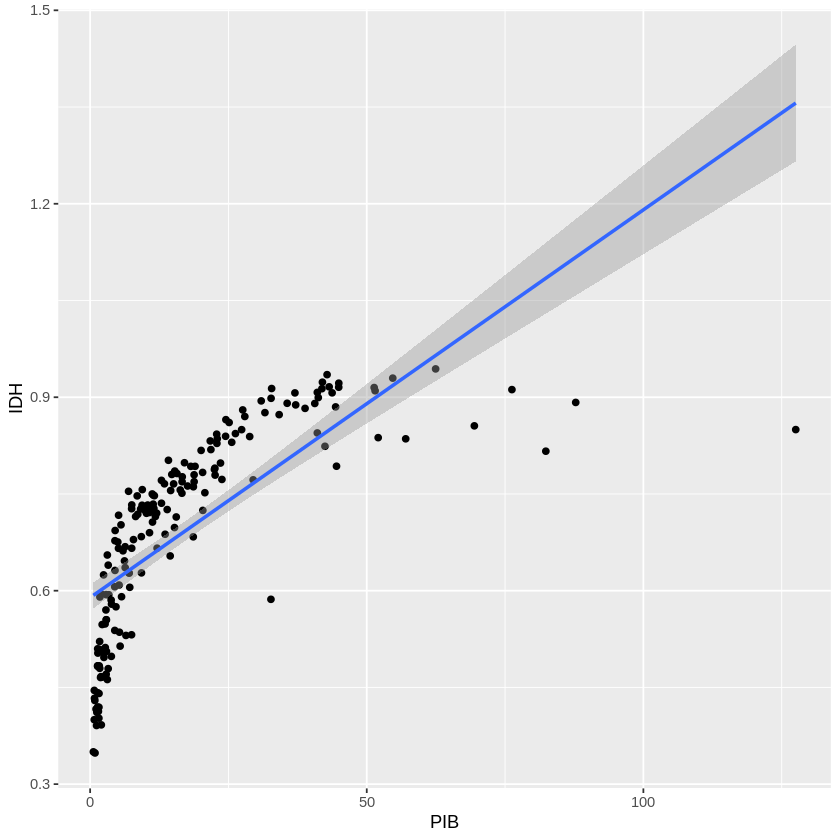

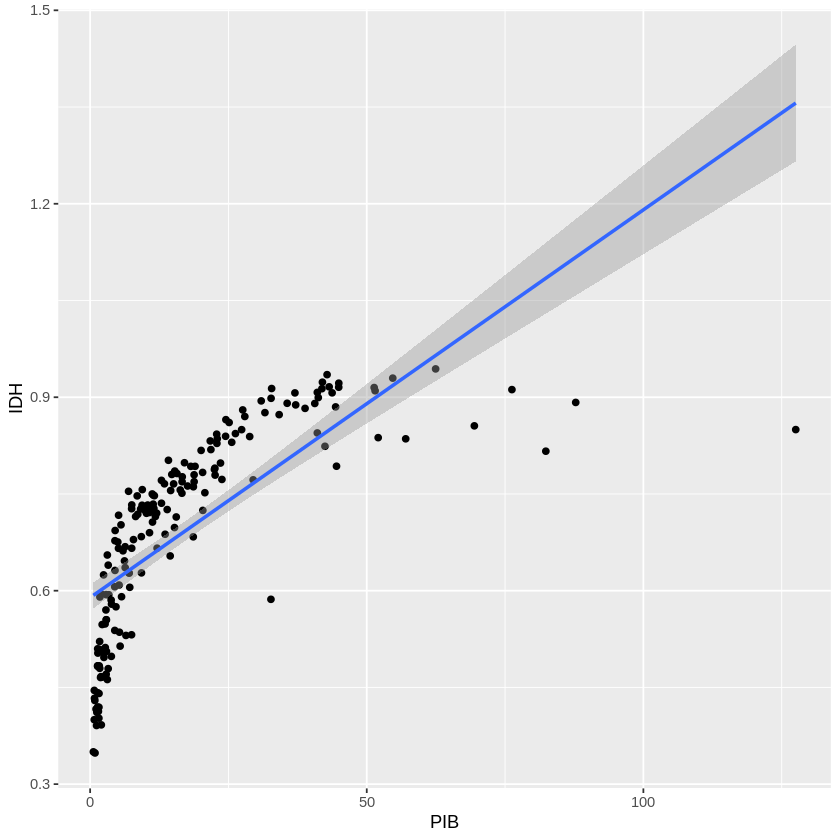

In [ ]:
ggplot(datosP, aes(x = PIB, y = IDH)) +
  geom_point() +
  geom_smooth(method = "lm")

ggplot(datosVar, aes(x = PIB, y = IDH)) +
  geom_point() +
  geom_smooth(method = "lm")

In [ ]:
mean(datosP$IDH)
mean(datosVar$IDH)

sd(datosP$IDH)
sd(datosVar$IDH)

cor(datosP$PIB,datosP$IDH)
cor(datosVar$PIB,datosVar$IDH)

[1] 0.6924415

[1] 0.6924415

[1] 0.1547061

[1] 0.1547061

[1] 0.7318694

[1] 0.7318694